In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [79]:
df = sns.load_dataset('titanic')[['survived', 'age', 'fare']]
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(714, 3)

In [82]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
X_train.head(2)

,age,fare
328,31.0,20.5250
73,26.0,14.4542


In [85]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [87]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330790297339594

In [88]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [89]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [90]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [91]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [92]:
trf.named_transformers_['first'].n_bins_

array([15])

In [93]:
trf.named_transformers_['first'].feature_names_in_

array(['age'], dtype=object)

In [94]:
output = pd.DataFrame({
    'age':X_train['age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['fare'],
    'fare_trf':X_train_trf[:,1]
})

In [95]:
output['age_labels'] = pd.cut(x=X_train['age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [96]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
654,18.0,2.0,6.7500,0.0,"(16.0, 19.0]","(0.0, 7.25]"
890,32.0,9.0,7.7500,1.0,"(30.0, 32.0]","(7.25, 7.775]"
592,47.0,13.0,7.2500,1.0,"(42.0, 47.0]","(0.0, 7.25]"
385,18.0,2.0,73.5000,12.0,"(16.0, 19.0]","(51.479, 76.292]"
599,49.0,13.0,56.9292,12.0,"(47.0, 54.0]","(51.479, 76.292]"


In [97]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [98]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [99]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6723004694835681

In [111]:
def discretize(bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbins_age, [0]),
        ('second', kbins_fare, [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')

    plt.show()

C:\Users\csawa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\csawa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6723982785602504


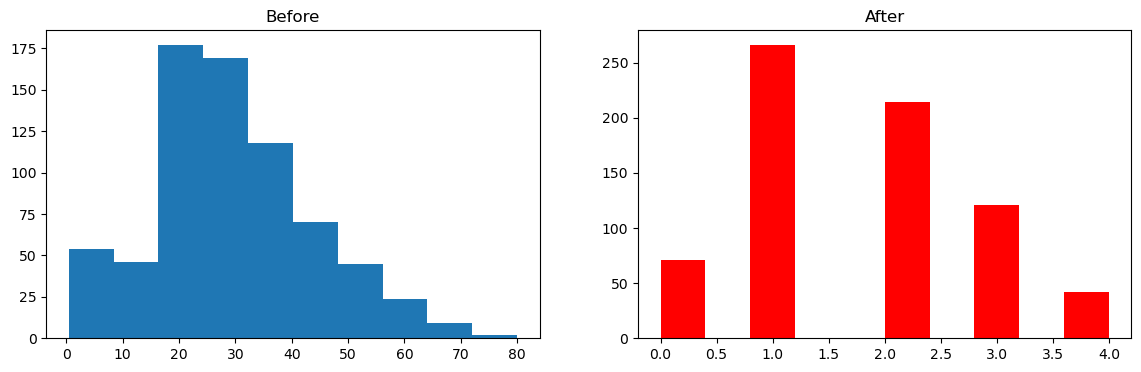

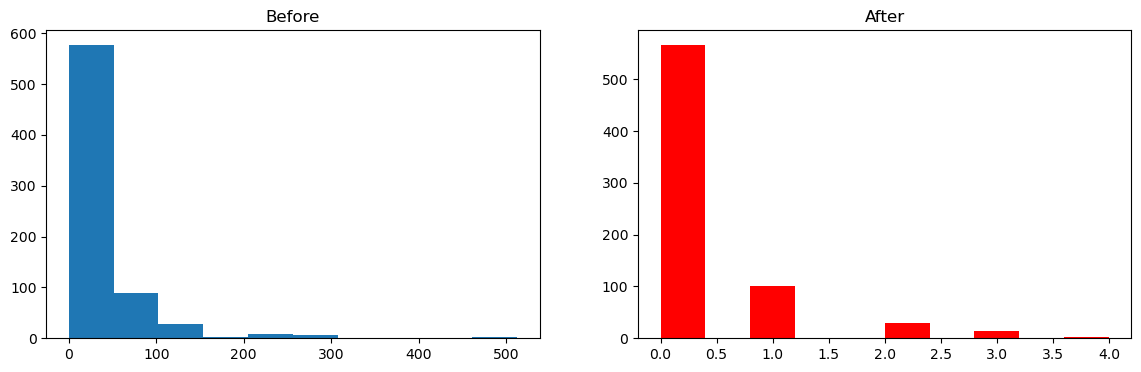

In [113]:
discretize(5, 'kmeans')